## Class labels

A big part of data science is classifying observations in a dataset into separate categories, or classes. A popular use case of data classification is in separating a dataset into "good" and "bad" categories. For example, we can classify a dataset of breast tumors as either malignant or benign.

The code below separates a breast cancer dataset into malignant and benign categories. The load_breast_cancer function is part of the scikit-learn library, and its data comes from the Breast Cancer Wisconsin dataset(https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)).

In the example below, the bc.data array contains all the dataset values, while the bc.target array contains the class ID labels for each row in bc.data. A class ID of 0 corresponds to a malignant tumor, while a class ID of 1 corresponds to a benign tumor.

Using the bc.target class IDs, we separated the dataset into malignant and benign data arrays. In other words, the malignant array contains the rows of bc.data corresponding to the indexes in bc.target containing 0, while the benign array contains the rows of bc.data corresponding to the indexes in bc.target containing 1. There are 212 malignant data observations and 357 benign observations.

In [1]:
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()
print('{}\n'.format(repr(bc.data)))
print('Data shape: {}\n'.format(bc.data.shape))

# Class labels
print('{}\n'.format(repr(bc.target)))
print('Labels shape: {}\n'.format(bc.target.shape))

# Label names
print('{}\n'.format(list(bc.target_names)))

malignant = bc.data[bc.target == 0]
print('Malignant shape: {}\n'.format(malignant.shape))

benign = bc.data[bc.target == 1]
print('Benign shape: {}\n'.format(benign.shape))

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

Data shape: (569, 30)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 

## Plotting by labels

The separate_data function that separates principal component data by class is incredibly useful for visualizing the components. We can use matplotlib to create nice plots of the separated data, using the first 2 columns of the 30 columns in bc.data after applying PCA.

[[1160.1425737  -293.91754364]
 [1269.12244319   15.63018184]
 [ 995.79388896   39.15674324]
 ...
 [ 314.50175618   47.55352518]
 [1124.85811531   34.12922497]
 [-771.52762188  -88.64310636]]



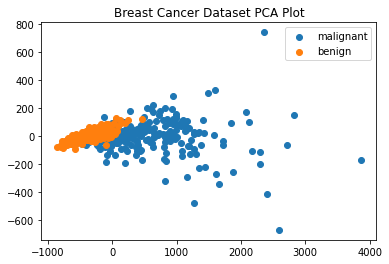

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA


def get_label_info(component_data, labels,
                   class_label, label_names):
  label_name = label_names[class_label]
  label_data = component_data[labels == class_label]
  return (label_name, label_data)


def separate_data(component_data, labels,
                  label_names):
  separated_data = []
  
  for class_label in range(len(label_names)):
      separated_data.append(get_label_info(component_data, labels, class_label, label_names))

  return separated_data


bc = load_breast_cancer()
pca_obj = PCA(n_components=2)
component_data = pca_obj.fit_transform(bc.data)
print('{}\n'.format(component_data))

labels = bc.target
label_names = bc.target_names
# Using the completed separate_data function
separated_data = separate_data(component_data,
                               labels, label_names)

# Plotting the data
import matplotlib.pyplot as plt
for label_name, label_data in separated_data:
  col1 = label_data[:, 0]  # 1st column (1st pr. comp.)
  col2 = label_data[:, 1]  # 2nd column (2nd pr. comp.)
  plt.scatter(col1, col2, label=label_name) # scatterplot
plt.legend()  # adds legend to plot
plt.title('Breast Cancer Dataset PCA Plot')
plt.show()